In [ ]:
#Exercise 3
#Check if your country is a polygon or multipolygon.
#Recover just the boundaries of that country.
#Turn the boundary into a GDF.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, geopandas as gpd
shapefile_path = "/content/drive/My Drive/SHAPEFILE/contdv250kgw/contdv250kgw.shp"
mexico=gpd.read_file(shapefile_path)

In [ ]:
#todos los valores completos
mexico[mexico.isna().any(axis=1)]

,AREA,PERIMETER,COV_,COV_ID,geometry


In [ ]:
#a) se observa que el pais es un polygon
mexico.geometry.type.unique()

array(['Polygon'], dtype=object)

In [ ]:
#b)Recuperando los boundaries
mexico.geometry.boundary

,0
0,"LINESTRING (-117.11734 32.46267, -117.11742 32..."
1,"LINESTRING (-117.29441 32.43412, -117.29514 32..."
2,"LINESTRING (-117.26293 32.42339, -117.2632 32...."
3,"LINESTRING (-117.25951 32.4148, -117.25991 32...."
4,"LINESTRING (-117.23958 32.39076, -117.23998 32..."
...,...
1171,"LINESTRING (-92.82037 15.16438, -92.82115 15.1..."
1172,"LINESTRING (-92.85334 15.16283, -92.8538 15.16..."
1173,"LINESTRING (-92.85617 15.1717, -92.85711 15.17..."
1174,"LINESTRING (-92.77406 15.15408, -92.77421 15.1..."


In [ ]:
#es un GS y se necesita un GDF
type(mexico.boundary)

geopandas.geoseries.GeoSeries

In [ ]:
#c) convertir el boundary a gdf
mexico.boundary.to_frame()
mexico.boundary.to_frame().info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1176 non-null   geometry
dtypes: geometry(1)
memory usage: 9.3 KB


In [ ]:
#ponerlo mas bonito y agregar informacion

#conversion
mexico_border=mexico.boundary.to_frame()
#nueva columna, añadiendo información
mexico_border['name']='Mexico'
#renombrar la columna de geometría
mexico_border.rename(columns={0:'geometry'},inplace=True)
#indicarle a geopandas cual de las columnas es la que contiene la informacion geografica principal
mexico_border = mexico_border.set_geometry("geometry")
#verificando el crs
mexico_border.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#producto final
mexico_border

,geometry,name
0,"LINESTRING (-117.11734 32.46267, -117.11742 32...",Mexico
1,"LINESTRING (-117.29441 32.43412, -117.29514 32...",Mexico
2,"LINESTRING (-117.26293 32.42339, -117.2632 32....",Mexico
3,"LINESTRING (-117.25951 32.4148, -117.25991 32....",Mexico
4,"LINESTRING (-117.23958 32.39076, -117.23998 32...",Mexico
...,...,...
1171,"LINESTRING (-92.82037 15.16438, -92.82115 15.1...",Mexico
1172,"LINESTRING (-92.85334 15.16283, -92.8538 15.16...",Mexico
1173,"LINESTRING (-92.85617 15.1717, -92.85711 15.17...",Mexico
1174,"LINESTRING (-92.77406 15.15408, -92.77421 15.1...",Mexico


<Axes: >

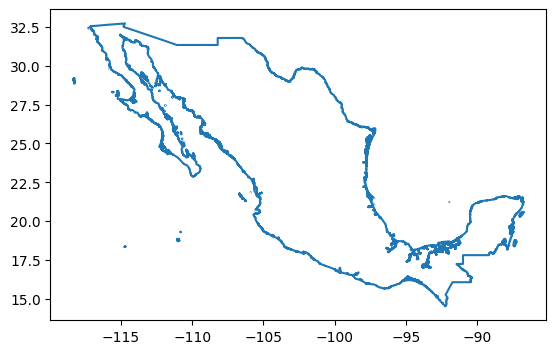

In [ ]:
mexico_border.plot()